# Convolutional Neural Networks (CNN)

## Table of Contents

* [Background](#Background)
    
* [How it Works](#How-it-Works)

* [Mathematical Theory](#Mathematical-Theory)

* [Practical Tips](#Practical-Tips)

* [Examples](#Examples)

    * [Dogs & Cats Dataset](#Dogs-&-Cats-Dataset)

    * [Brain Tumor MRI Dataset](#Example:-Brain-Tumor-MRI-Dataset)


(*Image Sources*: 
Cornelisse, Daphne. “An Intuitive Guide to Convolutional Neural Networks.” FreeCodeCamp.org, FreeCodeCamp.org, 24 Apr. 2018, medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050.<br>
Rohrer, Brandon. “How Convolutional Neural Networks Work.” YouTube, YouTube, 18 Aug. 2016, www.youtube.com/watch?v=FmpDIaiMIeA.)

## Background

Convolutional Neural Networks (CNN) have powered much of the excitement in the field of computer vision today. CNNs are a type of deep neural network that specialize in capturing local, spatial patterns. CNNs have proven to perform very well on clasification and image recognition tasks. CNNs had their start thanks to the pioneering work of French computer scientist Yann LeCun in the late 1980's. LeCun's 'LeNet' architecture was used mainly for the recognition of zip codes and numerical digits. 

From the 1990's and into the 2010's, convolutional nets have been able to improve drastically made which has been made possible by vast improvements in computational power. Now, CovNets have been able to tackle problems that have required amounts of data not previously seen or worked with before. Improvements in the original LeNet architecture have arrived in the form of of AlexNet in 2012 which was a deeper and wider version of the LeNet. In 2013, ZF Net appeared as an improvement on the AlexNet. The GoogLeNet in 2014 came with the development of the 'Inception Module' which dramatically reduced the number of parameters in the network. In the most recent years, the DenseNet architecture has prevailed as the current state of the art Convolutional Neural Network model and serves as the default choice for CovNet architecture for practical implementations. 

## How it Works

There are 4 primary steps that occur in a CNN model:

* Convolution
* Non Linearity (ReLU Layer)
* Pooling (Max Pooling)
* Classification (Fully Connected Layer)

![](images/img_8.png)

All images can be represented as single 2-dimensional matrices of values. Suppose the image we are concerned with is in black and white; this makes it a 'greyscale' image. Each cell of the matrix represents a single pixel in the image while the value in each cell represents the greyscale value of tha pixel which ranges from 0 to 255; 0 symbolizing the color black and 255 symbolizing white. If the image were colored, then each cell would have 3 values each between 0 and 255, representing the saturation of red, green, and blue in each pixel. 

The first step of the model is 'convolution' which serves to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares, or windows, of input data; these windows are called 'features'. Each feature is a different piece, or pattern, of the image, usually 3x3 pixels in size. When the model is matching a feature to the image, it does so through 'filtering'. This is achieved by lining up the feature and a patch of the image, multiplying the value of each feature pixel with the  corresponding pixel value in the image patch, taking the sum of all those products and dividing by the total number of pixels in the feature. The result is recorded in a pixel of a new, smaller n x n square so that the model keeps track of how well each patch matches a certain feature. This is done for every possible patch on the image, or position of the feature. In the folowing images, we have 1 and -1 representing white and black, respectively, instead of a number between 0 and 255, for simplicity.

![](images/img_3.png)

This process of convolution can be repeated for different features of the image each producing its own value map for how well it matched with different patches of the image. When theys feature maps are stacked on top of each other, you have whats called a 'convolutional layer'.

![](images/img_4.png)

Next, to make the math easier, we 'normalize' each filtered image. Simply, this is just turning every value that is negative, into a zero. This creates a 'Rectified Linear Unit' (ReLU) layer. Mathematically, this is done by passing the values from the convolutional layer into the Rectifier Activation Funciton. This done to reduce linearity in the CNN.

![](images/img_5.png)

What follows is called 'pooling' which is shrinking the filtered image stack that resulted from the convolution step. We pick a window size, usually 2x2 or 3x3 pixels, and pick a stride, usually 2 pixels, you then walk this window across each filtered image in the stack, and, for each position, record the maximum value of the pixels that appear in the window. So, a stack of filtered images becomes a stack of smaller images. Pooling allows for the removal of irrelevant features and prevents the CovNet from overfitting on the image data. This also allows the model to better generalize and remain robust against differing orientations of an object/image. Here, max-pooling, specifically, has been applied but other types of pooling exist as well.

![](images/img_6.png)

We can repeat the last 3 steps again to shrink the images even further a process called 'deep stacking'.

Finally, we reach the fully connected layer in which the values in each filtered, shrinked feature image is turned into a list, a process called 'flattening', and each value 'votes' for a prediction. The values are weighted and each prediction recieves a value. The prediction with the highest value becomes the final prediction of the model. The output nodes, in a sense, memorize which nodes in the final hidden layer represent features that strongly suggest their prediction. So, when the nodes in the final hidden layer possess high values, they are signaling to the output nodes what specific features are present in the image.

![](images/img_7.png)  

The feature values in the convolution layer and the voting weights in the fully connected layer(s) are determined by backpropogation with gradient descent.

CNNs can be used for any type of 2 or 3-dimensional data as long as things closer together, in the 2/3-D structure, are more closely related than things that are farther apart. One can turn sound into an image and and successfully produce insights from passing the data into a CNN. As a rule of thumb, if the data is just as useful after swapping columns with eachother as before, then a CNN is not an appropriate model for the data. 

## Mathematical Theory

**Convolution Function**; a combined integration of two functions which shows how one function modifies the other:

\begin{equation*}
(f * g)(t) := \int_{-\infty}^{\infty} f(\tau)g(t - \tau)d\tau 
\end{equation*}

**Rectifier Function**; used to normalize filtered images in the ReLU layer:

\begin{equation*}
f(x) = x^{+} = max(0,x)
\end{equation*}

**Softmax**; the function that makes sure the values in the output nodes sum up to one:

\begin{equation*}
f_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}
\end{equation*}

**Cross-Entropy**; the most common cost/loss fuction used in CovNets:

\begin{equation*}
L_i = -log(\frac{e^{f_{y_i}}}{\sum_j e^{f_j}})
\end{equation*}
\begin{equation*}
H(p,q) = -\sum_x p(x) log(q(x))
\end{equation*}


## Practical Tips

* Consider using the Parametric Rectified activation function, as oppose to the regular Rectified activation function, as it has been shown to increase CovNet performance.


* Consider using a different type of pooling technique (sum, mean, max).


* Parameters that can be tweaked in a CNN include:
    * Number and size of the features in the convolution layer.
    * Window size and stride during pooling.
    * Number of neurons in the fully connected layer. 
    * How many of each type of layer to have and in what order.

## Examples

Now, we will create a ConvNet for classification using two different datasets. the first being a to data set using images of dogs and cats, the second being a dataset of brain tumor MRIs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import time
from sklearn.model_selection import train_test_split
import random
from PIL import Image
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [111]:
# Building the CovNet
    
# Initializing the model

classifier = Sequential()

# Step 1: Convolution

classifier.add(Convolution2D(filters = 32, kernel_size = 3, input_shape=(64, 64, 3), activation = 'relu'))

# Step 2: Max Pooling

classifier.add(MaxPooling2D())

# Step 3: Flattening

classifier.add(Flatten())

# Step 4: Full Connection

classifier.add(Dense(units = 128, activation = 'relu')) # adding a final hidden layer
classifier.add(Dense(units = 1, activation = 'sigmoid')) # adding an output layer; softmax activation and output_dim >= 3 if multiclass prob

# Compiling the ConvNet

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # loss is categorical Cross-Entropy if multiclass prob


### Dogs & Cats Dataset

The ConvNet will, first, be trained on various images of cats and dogs extracted from google's image search. The image data is seperated into a trainin set, with 8,000 images, and a test set, with 2,000 images.

![](Dogs_Cats_Data/training_set/cats/cat.1.jpg) ![](Dogs_Cats_Data/training_set/dogs/dog.4.jpg)  

In [113]:
# Fitting the ConvNet model to the dogs and cats dataset

def convnet_fit(train = 'Dogs_Cats_Data/training_set', test = 'Dogs_Cats_Data/test_set',
                num_train_points = 8000, epochs = 10, num_test_points = 2000, model = classifier):
    
    train_datagen = ImageDataGenerator(rescale = 1./255,           # Augmentation of the images
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True)

    test_datagen = ImageDataGenerator(rescale = 1./255)     # Rescaling test set pixel values

    training_set = train_datagen.flow_from_directory(train, 
                                                     target_size = (64, 64), 
                                                     batch_size = 32, 
                                                     class_mode = 'binary')

    test_set = test_datagen.flow_from_directory(test,
                                                target_size = (64, 64),
                                                batch_size = 32,
                                                class_mode = 'binary')

    model.fit_generator(training_set,
                        steps_per_epoch = (num_train_points/32),
                        epochs = epochs,
                        validation_data = test_set,
                        validation_steps =  (num_test_points/32))
    return(model)

In [114]:
%%time

classifier = 
fit_classifier = convnet_fit()

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
250/250 [==============================] - 129s 514ms/step - loss: 0.6770 - acc: 0.5677 - val_loss: 0.6409 - val_acc: 0.6140
Epoch 2/10
250/250 [==============================] - 112s 447ms/step - loss: 0.6121 - acc: 0.6644 - val_loss: 0.5673 - val_acc: 0.7100
Epoch 3/10
250/250 [==============================] - 122s 488ms/step - loss: 0.5673 - acc: 0.7059 - val_loss: 0.5478 - val_acc: 0.7270
Epoch 4/10
250/250 [==============================] - 125s 499ms/step - loss: 0.5278 - acc: 0.7342 - val_loss: 0.5048 - val_acc: 0.7535
Epoch 5/10
250/250 [==============================] - 129s 516ms/step - loss: 0.4993 - acc: 0.7520 - val_loss: 0.4860 - val_acc: 0.7630
Epoch 6/10
250/250 [==============================] - 135s 538ms/step - loss: 0.4803 - acc: 0.7696 - val_loss: 0.4540 - val_acc: 0.7910
Epoch 7/10
250/250 [==============================] - 113s 450ms/step - loss: 0.4504 - acc: 0.7860 -

Our model has managed to obtain a training accuracy of ~82% and a test accuracy of ~81%. Let's see if we can improve the test accuracy of the model by adding two additional convolution layers. We will also change the number of filters in the convolution layer from 32 to 64.

In [119]:
# Improved CovNet

classifier_new = Sequential()

classifier_new.add(Convolution2D(filters = 64, kernel_size = 3, input_shape=(64, 64, 3), activation = 'relu'))

classifier_new.add(MaxPooling2D())

# Adding a second & third convolution layer

classifier_new.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
classifier_new.add(MaxPooling2D())

classifier_new.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
classifier_new.add(MaxPooling2D())

classifier_new.add(Flatten())

classifier_new.add(Dense(units = 128, activation = 'relu')) 
classifier_new.add(Dense(units = 1, activation = 'sigmoid')) 

classifier_new.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [120]:
%%time

fit_improved_classifier = convnet_fit(model = classifier_new)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
250/250 [==============================] - 124s 495ms/step - loss: 0.6859 - acc: 0.5425 - val_loss: 0.6510 - val_acc: 0.6110
Epoch 2/10
250/250 [==============================] - 123s 492ms/step - loss: 0.6371 - acc: 0.6466 - val_loss: 0.5791 - val_acc: 0.7070
Epoch 3/10
250/250 [==============================] - 114s 455ms/step - loss: 0.5799 - acc: 0.6980 - val_loss: 0.5354 - val_acc: 0.7415
Epoch 4/10
250/250 [==============================] - 111s 444ms/step - loss: 0.5468 - acc: 0.7254 - val_loss: 0.4968 - val_acc: 0.7570
Epoch 5/10
250/250 [==============================] - 111s 443ms/step - loss: 0.5112 - acc: 0.7445 - val_loss: 0.4867 - val_acc: 0.7730
Epoch 6/10
250/250 [==============================] - 125s 499ms/step - loss: 0.4836 - acc: 0.7658 - val_loss: 0.4697 - val_acc: 0.7835
Epoch 7/10
250/250 [==============================] - 122s 490ms/step - loss: 0.4692 - acc: 0.7741 -

It seems that, for the first 8 epochs, the model was improving at a rate superior to that of the initial model but began to deteriorate during the 9th epoch at which point the accuracy of the test set dropped by ~4 percentage points. this may hint towards possible overfitting although, the accuracy rebounded slightly increasing from 77% to 78% by the last epoch. If attempting to improve the model even further, one may want to consider applying regularization to the model which would prevent overfitting and improve generalization. In addition, the miriad of additional parameters in the model would be tampered with until acceptable levels of accuracy were achieved. For now, we have gained a strong insight into the process of building a ConvNet. We will now put our skills to the test with a new dataset.

### Brain Tumor MRI Dataset

In this example, we will create a convolutional neural network for the calssification of various brain tumors using MRI image data. The dataset was originally gathered by Jun Cheng of the School of Biomedical Engineering of the Southern Medical University in Guangzhou, China. The dataset was featured in the publication *'Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).'* and *'Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector Representation." PloS one 11.6 (2016).'* The dataset is currently being hosted on [figshare.com](https://figshare.com/articles/brain_tumor_dataset/1512427). The dataset itself consists of 3064 T1-weighted and contrast-inhanced images from 233 patients with three kinds of brain tumor: meningioma, glioma, and pituitary.

Let's take a look at what a single data file consists of.

In [3]:
with h5py.File('Brain_Tumor_Data/Brain_Tumor_Data_1/1.mat', 'r') as f:
    print(list(f['cjdata'].keys()))
    a = list(f['cjdata']['PID'])
    b = list(f['cjdata']['image'])
    c = list(f['cjdata']['label'])
    d = list(f['cjdata']['tumorBorder'])
    e = list(f['cjdata']['tumorMask'])

['PID', 'image', 'label', 'tumorBorder', 'tumorMask']


In [4]:
for letter in [a,b,c,d,e]:
    print(len(letter), type(letter), type(letter[0]))

6 <class 'list'> <class 'numpy.ndarray'>
512 <class 'list'> <class 'numpy.ndarray'>
1 <class 'list'> <class 'numpy.ndarray'>
1 <class 'list'> <class 'numpy.ndarray'>
512 <class 'list'> <class 'numpy.ndarray'>


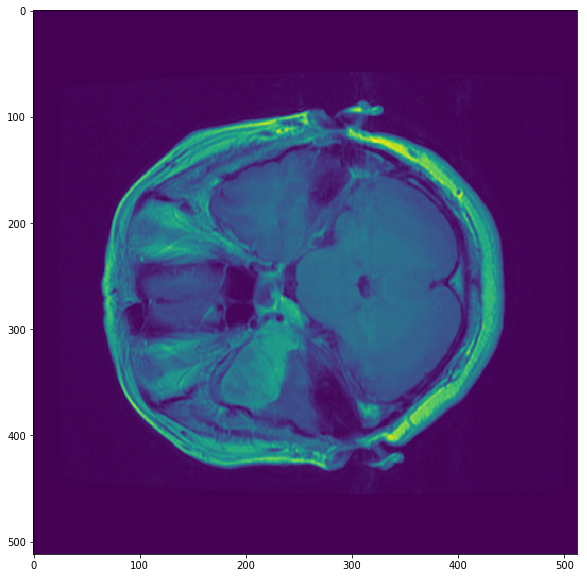

In [5]:
plt.figure(figsize = (20,10))
plt.imshow(b)

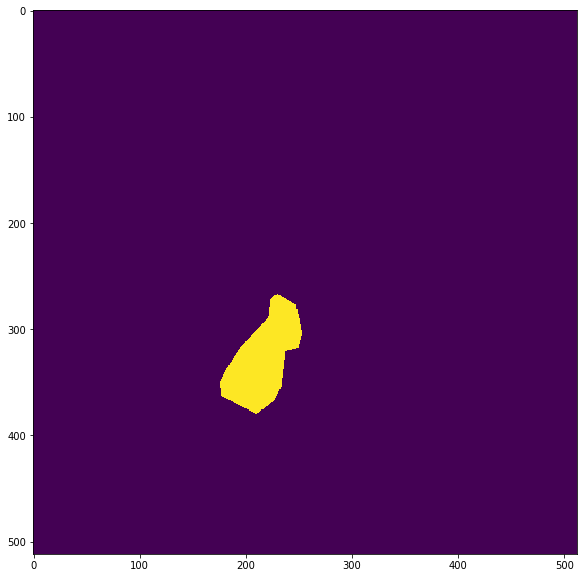

In [6]:
plt.figure(figsize = (20,10))
plt.imshow(e)

The pieces of information that are most pertinent to the current project will be the images themselves, 'image', the tumeor classification, 'labels', and, perhaps, the images of the delineations of the tumors themselves, 'tumorMask'. Lets extract these  . . . .

In [7]:
%%time
# Extracting all of the relevant image data

image_numbers = [range(1,767), range(767,1533), range(1533,2299), range(2299,3065)]

mri_image_data = []
tumor_shape_data = []

for i in range(1,5,1):
    
    for j in image_numbers[i-1]:
        
        directory = 'Brain_Tumor_Data/Brain_Tumor_Data_%d/%d.mat' % (i,j)

        with h5py.File(directory, 'r') as f:
            
            mri_image = list(f['cjdata']['image'])
            mri_label = list(f['cjdata']['label'])
            mri_image_data.append([mri_image, mri_label])
            
            tumor_image = list(f['cjdata']['tumorMask'])
            tumor_label = list(f['cjdata']['label'])
            tumor_shape_data.append([tumor_image, tumor_label])

CPU times: user 21min 23s, sys: 1min 41s, total: 23min 5s
Wall time: 24min 19s


In [8]:
# Shuffling the data

random.seed(2019)
random.shuffle(mri_image_data)
random.seed(2019)
random.shuffle(tumor_shape_data)

In [9]:
# Creating a training set and test set for the MRI image data

X = [lst[0] for lst in mri_image_data]
Y = [lst[1] for lst in mri_image_data]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,  random_state = 2019)

In [230]:
# Functions that turn data into a list of lists

def restructure_input(old_struct):

    new_structure = []

    for lst in old_struct:
        sub_lst = []
        for array in lst:
            new_list = array.tolist()
            new_list = new_list+[0]*(512-len(new_list))
            new_list = [x/255 for x in new_list]
            sub_lst.append(np.array(new_list))
        new_structure.append(np.array(sub_lst))
    
    new_structure = np.array(new_structure)
    
    return(new_structure)

def restructure_output(old_struct):

    new_structure = []

    for lst in old_struct:
        
        for array in lst:
            new_list = array.tolist()
            if new_list[0] == 1.0:
                new_vec = [1,0,0]
            elif new_list[0] == 2.0:
                new_vec = [0,1,0]
            else:
                new_vec = [0,0,1]
            new_structure.append(new_vec)
    
    return(new_structure)

In [110]:
# Creating the CovNet

cancer_classifier = Sequential()

cancer_classifier.add(Convolution2D(filters = 64, kernel_size = 3, input_shape=(512, 512, 1), activation = 'relu', 
                                   data_format = 'channels_last'))
cancer_classifier.add(MaxPooling2D())

cancer_classifier.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
cancer_classifier.add(MaxPooling2D())

cancer_classifier.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
cancer_classifier.add(MaxPooling2D())

cancer_classifier.add(Flatten())

cancer_classifier.add(Dense(units = 128, activation = 'relu')) 
cancer_classifier.add(Dense(units = 3, activation = 'softmax')) 

cancer_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [247]:
# Creating a custom fit_generator to read in individual images into the model

def generate_array(xtrain, ytrain):
    
    for i in range(0,len(x_train)):

        if len(xtrain[i]) == 512:
        
            x_sublst = []
            for array in xtrain[i]:
                new_list = array.tolist()
                new_list = new_list+[0]*(512-len(new_list))
                new_list = [x/255 for x in new_list]
                x_sublst.append(np.array(new_list))
            train = np.array(x_sublst)
            train = train.reshape(1, 512, 512, 1)

            y_sublst = []
            for array in ytrain[i]:
                new_list = array.tolist()
                if new_list[0] == 1.0:
                    new_vec = [1,0,0]
                elif new_list[0] == 2.0:
                    new_vec = [0,1,0]
                else:
                    new_vec = [0,0,1]
                y_sublst.append(new_vec)
            test = np.array(y_sublst)
            test = test.reshape(1, 3)

            yield (train, test)
      
    
    
cancer_classifier.fit_generator(generate_array(x_train, y_train), steps_per_epoch=len(x_train), epochs=1)  

In [245]:
# Obtaining the model predictions on the test set 

new_y_test = restructure_output(y_test)

predictions = []

for i in range(0,len(x_test)):

        if len(x_test[i]) == 512:
        
            x_sublst = []
            for array in x_test[i]:
                new_list = array.tolist()
                new_list = new_list+[0]*(512-len(new_list))
                new_list = [x/255 for x in new_list]
                x_sublst.append(np.array(new_list))
            train = np.array(x_sublst)
            train = train.reshape(1, 512, 512, 1)
            
            prediction = cancer_classifier.predict(train)
                
            predictions.append(prediction.tolist()[0])
                

In [246]:
# Getting model accuracy

count = 0

for i in range(0,len(predictions)):
    if predictions[i] == new_y_test[i]:
        count += 1
        
print('Model Accuracy: ', (count/len(predictions))*100, '%')

Model Accuracy:  23.809523809523807 %


Unfortunately, the resulting predictive model did not work as well as I would have hoped. The final model seems to predict a single tumor type for all of the data in the test set leading to an accuracy of 23.8%. The greatest difficulties of utilizing the dataset was not only the fact that all of the image data would not fit into the RAM of my computer but that the image data was presented in raw matlab file format which is more difficult to deal with than images in .jpg or .png form. It looks like I was able to read in the image data and manipulate it in such a way that the model could be trained on it. Although, the process is quite inefficient and additional time would be needed to not only make sure that the model is being properly trained on the image data, but to optomize the model in order for it to reach a satisfactory rate of accuracy as well. This project may be revisited some time in the future but, at the very least, it has been demonstrated that a convolutional neural network can be trained on MRI images in order to predict the presence of different type of brain tumors.